In [37]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

%matplotlib inline

In [25]:
location = 'C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/strats/crypto_new_strats_1_15_2019/'
btcusdt_res = pd.read_csv(location+"res_btcusdt_15m.csv", header =None)
ethbtc_res = pd.read_csv(location+"res_ethbtc_15m.csv", header = None)
eosbtc_res = pd.read_csv(location+"res_eosbtc_15m.csv", header = None)

In [26]:
ethbtc_res.head()

,0,1,2,3,4,5
0,2017-12-08 00:00:00,0.026218,0.026218,0.025571,0.025574,9.335432
1,2017-12-08 00:15:00,0.025574,0.025741,0.025100,0.025205,18.530062
2,2017-12-08 00:30:00,0.025205,0.026457,0.025205,0.025826,16.680370
3,2017-12-08 00:45:00,0.025804,0.026955,0.025800,0.026922,11.512267
4,2017-12-08 01:00:00,0.026831,0.026905,0.026382,0.026687,9.116853


In [27]:
df_list = [btcusdt_res, ethbtc_res, eosbtc_res]

In [28]:
for df in df_list:
    df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    df['prev_close'] = df['close'].shift(1)

In [30]:
eosbtc_res.head(3)

,date,open,high,low,close,volume,prev_close
0,2017-12-08 00:00:00,0.000233,0.000245,0.000233,0.000233,9.574111,NaN
1,2017-12-08 00:15:00,0.000239,0.000250,0.000230,0.000240,13.607629,0.000233
2,2017-12-08 00:30:00,0.000240,0.000245,0.000231,0.000243,14.306783,0.000240


In [35]:
for df in df_list:
    df.set_index('date',inplace=True)
    TR = (df['high'] - df['low'])/df['prev_close']
    df['TR'] = TR
    max_TR_pct_chg = TR.max()
    print (max_TR_pct_chg)

0.14826760116348328
0.4505336344714584
0.1651152675076121


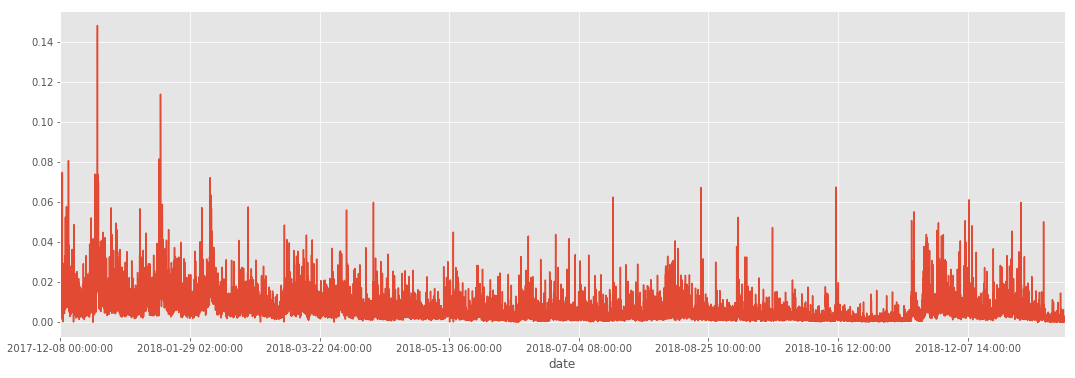

In [40]:
btcusdt_res.TR.plot(figsize=(18, 6))

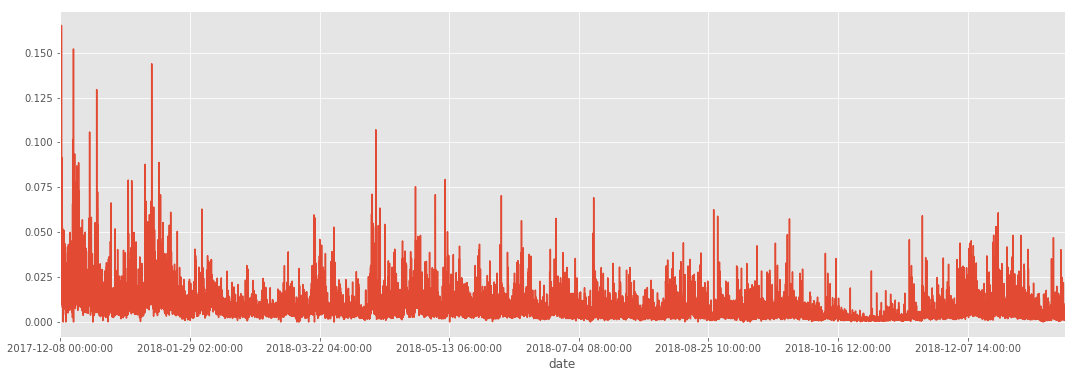

In [39]:
eosbtc_res.TR.plot(figsize=(18, 6))

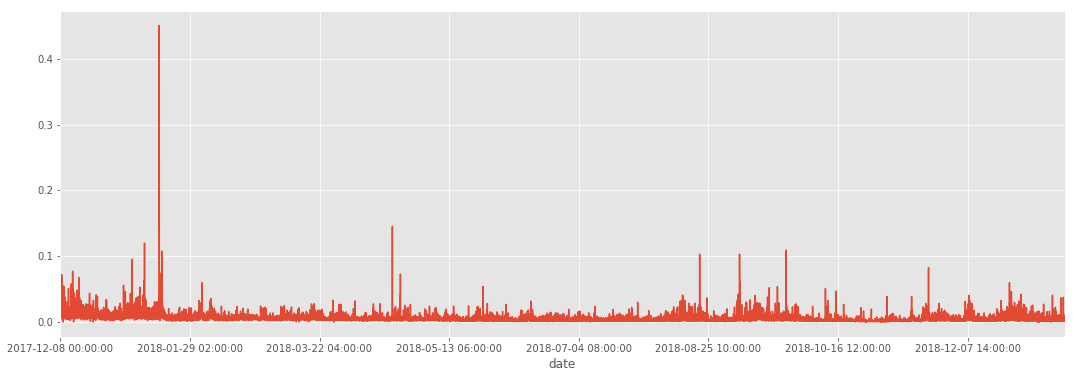

In [41]:
ethbtc_res.TR.plot(figsize=(18, 6))

In [59]:
print ("eth's TR 大于10%的次数: ", len(ethbtc_res[ethbtc_res.TR >0.1]))
print ("概率为： ", 100*len(ethbtc_res[ethbtc_res.TR >0.1])/len(ethbtc_res),"%")

eth's TR 大于10%的次数:  1
概率为：  0.002581444576384945 %


In [57]:
print ("eos's TR 大于10%的次数: ", len(eosbtc_res[eosbtc_res.TR >0.1]))
print ("概率为： ", 100*len(eosbtc_res[eosbtc_res.TR >0.1])/len(eosbtc_res),"%")

eos's TR 大于10%的次数:  9
概率为：  0.023233001187464505 %


In [58]:
print ("btc's TR 大于10%的次数: ", len(btcusdt_res[btcusdt_res.TR >0.1]))
print ("概率为： ", 100*len(btcusdt_res[btcusdt_res.TR >0.1])/len(btcusdt_res),"%")

btc's TR 大于10%的次数:  3
概率为：  0.007744333729154835 %


In [72]:
def cut(df):
    first = df[df['TR']<=0.1]
    second = df[(df['TR']>0.1)&(df['TR']<=0.2)]
    third = df[(df['TR']>0.2)&(df['TR']<=0.3)]
    fourth = df[(df['TR']>0.3)&(df['TR']<=0.4)]
    fifth = df[df['TR']>0.4]
    
    print ("小于等于10%的次数： ", len(first))
    print ("10%-20%的次数： ", len(second))
    print ("20%-30%的次数： ", len(third))
    print ("30%-40%的次数： ", len(fourth))
    print ("大于40%的次数： ", len(fifth))

In [73]:
cut(ethbtc_res)

小于等于10%的次数：  38727
10%-20%的次数：  8
20%-30%的次数：  1
30%-40%的次数：  0
大于40%的次数：  1


In [74]:
cut(eosbtc_res)

小于等于10%的次数：  38728
10%-20%的次数：  9
20%-30%的次数：  0
30%-40%的次数：  0
大于40%的次数：  0


In [75]:
cut(btcusdt_res)

小于等于10%的次数：  38734
10%-20%的次数：  3
20%-30%的次数：  0
30%-40%的次数：  0
大于40%的次数：  0


In [77]:
ethbtc_res_copy = ethbtc_res.copy()

In [79]:
ethbtc_res_copy.reset_index(inplace=True)

In [83]:
perf = pd.read_csv(location+"1_16_2019_分析数字货币信息.csv", engine="python")

In [85]:
perf.columns = ['strat', 'position_direction', 'asset', 'entry_date', 'entry_price', 'exit_date', 'exit_price', 'qty', 'trade_costs', 'net_gains', 'cum_gains',
       'returns', 'cum_returns']

In [86]:
perf.head()

,strat,position_direction,asset,entry_date,entry_price,exit_date,exit_price,qty,trade_costs,net_gains,cum_gains,returns,cum_returns
0,C06_ETHBTC_one_leg,空头,ZW_BTC,2017-12-9 19:45,67.74,2017-12-10 6:30,68.94,3698,303.27,-4740.87,-4740.87,-6998.62%,-6998.62%
1,C06_ETHBTC_one_leg,多头,ZW_BTC,2017-12-21 5:45,61.89,2017-12-22 6:30,64.08,4050,306.11,8563.39,3822.53,13836.47%,6837.85%
2,C06_ETHBTC_one_leg,多头,ZW_BTC,2017-12-30 2:30,69.14,2017-12-30 21:15,83.33,3630,332.08,51177.62,55000.15,74020.28%,80858.13%
3,C06_ETHBTC_one_leg,空头,ZW_BTC,2017-12-31 1:30,81.23,2017-12-31 23:30,76.32,3086,291.72,14860.54,69860.69,18294.40%,99152.53%
4,C06_ETHBTC_one_leg,空头,ZW_BTC,2018-1-2 13:00,75.99,2018-1-3 7:30,68.61,3301,286.39,24074.99,93935.67,31681.78%,130834.31%


In [123]:
def transform(perf):
    new_df = pd.DataFrame([])
    new_df["date"] = perf['entry_date']
    new_df['strat'] = perf['strat']
    new_df['asset'] = perf['asset']
    new_df['entry_date'] = perf['entry_date']
    new_df['entry_price'] = perf['entry_price']
    new_df['qty'] = perf['qty']
    new_df['pos_dirctn'] = perf['position_direction']
    
    all_dates = list(perf['entry_date'].append(perf['exit_date']))
    all_strats = list(perf['strat'].append(perf['strat']))
    all_assets = list(perf['asset'].append(perf['asset']))
    all_qty = list(perf['qty'].append(perf['qty']))
    all_pos_dirctn = list(perf['position_direction'].append(perf['position_direction']))
    all_exit_price = perf['exit_price']
    
    new_df = pd.DataFrame([])
    new_df['all_dates'] = all_dates
    new_df['all_strats'] = all_strats
    new_df['assets'] = all_assets
    new_df['pos_dirctn'] = all_pos_dirctn
    new_df['qty'] = all_qty
    
    new_df['entry_price'] = perf['entry_price']
    new_df['exit_price'] = ''
    new_df['exit_price'][len(perf):] = all_exit_price
    
    new_df['all_dates'] = pd.to_datetime(new_df['all_dates'])
    new_df.sort_values('all_dates', inplace=True)
    new_df.fillna("", inplace=True)
    new_df['all_dates'] = new_df['all_dates'].astype(str)
    
    return new_df

new_df = transform(perf)

C:\Users\Brad Sun\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [125]:
new_df.columns = ['dates', 'all_strats', 'assets', 'pos_dirctn', 'qty', 'entry_price',
       'exit_price']

In [126]:
new_df['dates'] = pd.to_datetime(new_df['dates'])
# new_df.set_index('all_dates', inplace = True)

In [130]:
ethbtc_res.reset_index(inplace = True)

In [136]:
ethbtc_res.columns = ['dates', 'open', 'high', 'low', 'close', 'volume', 'prev_close', 'TR']

In [141]:
ethbtc_res['dates'] = pd.to_datetime(ethbtc_res['dates'])

In [240]:
merged_eth = ethbtc_res.merge(new_df, on='dates', how = 'outer')

In [241]:
merged_eth.dropna().head()

,dates,open,high,low,close,volume,prev_close,TR,all_strats,assets,pos_dirctn,qty,entry_price,exit_price
175,2017-12-09 19:45:00,0.031325,0.031347,0.031026,0.031320,4.632358,0.031217,0.010283,C06_ETHBTC_one_leg,ZW_BTC,空头,3698.0,67.74,
218,2017-12-10 06:30:00,0.031579,0.031616,0.031299,0.031299,6.940646,0.031563,0.010043,C06_ETHBTC_one_leg,ZW_BTC,空头,3698.0,,68.94
1271,2017-12-21 05:45:00,0.048264,0.048772,0.048000,0.048456,2.307621,0.048500,0.015918,C06_ETHBTC_one_leg,ZW_BTC,多头,4050.0,61.89,
1370,2017-12-22 06:30:00,0.049927,0.050158,0.049826,0.050060,18.569868,0.049927,0.006650,C06_ETHBTC_one_leg,ZW_BTC,多头,4050.0,,64.08
2122,2017-12-30 02:30:00,0.050785,0.051334,0.050655,0.050839,9.639794,0.050797,0.013367,C06_ETHBTC_one_leg,ZW_BTC,多头,3630.0,69.14,


In [242]:
mask_s = np.array(merged_eth['pos_dirctn'].copy())
np.place(mask_s, mask_s=='空头', -1)
mask_sr_s = pd.Series(mask_s)
merged_eth['pos_signal'] = mask_sr_s

In [243]:
mask_l = np.array(mask_sr_s.copy())
np.place(mask_l, mask_l=='多头', 1)
mask_sr_l = pd.Series(mask_l)
merged_eth['pos_signal'] = mask_sr_l

In [230]:
mask_no_pos = np.array(mask_sr_l.copy())
np.place(mask_no_pos, mask_no_pos==merged_eth['pos_signal'][0], 0)
mask_sr_no_pos = pd.Series(mask_no_pos)
merged_eth['pos_signal'] = mask_sr_no_pos

In [265]:
merged_eth['pos_signal'] = merged_eth['pos_signal'].fillna(0)

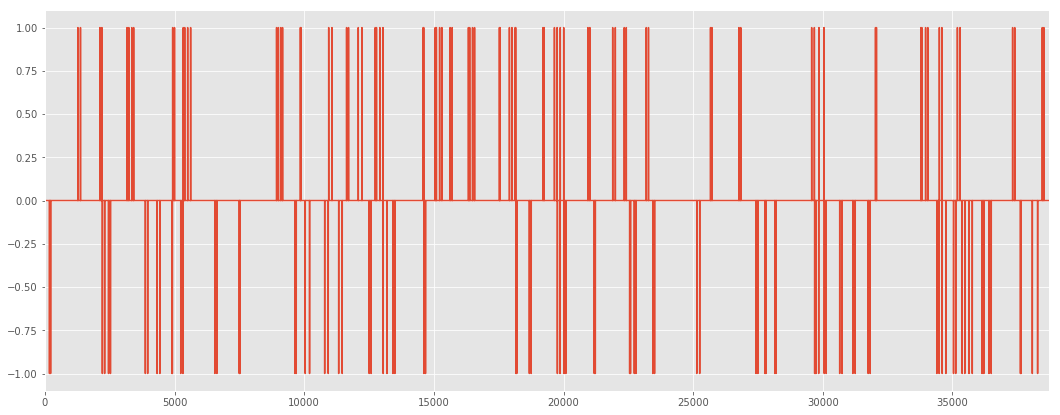

In [269]:
merged_eth['pos_signal'].plot(figsize = (18, 7))

In [273]:
merged_to_norm = merged_eth[['TR', 'pos_signal']]

In [276]:
from sklearn.preprocessing import StandardScaler
def normalize(x):
    scaler = StandardScaler()
    # 公式为：(X-mean)/std  计算时对每个属性/每列分别进行。
    # 将数据按期属性（按列进行）减去其均值，并除以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。
    x_norm = scaler.fit_transform(x.values)
    x_norm = pd.DataFrame(x_norm, index=x.index, columns=x.columns)
    return x_norm

In [279]:
merged_to_norm.dropna(inplace=True)

C:\Users\Brad Sun\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [281]:
normed_merged = normalize(merged_to_norm)

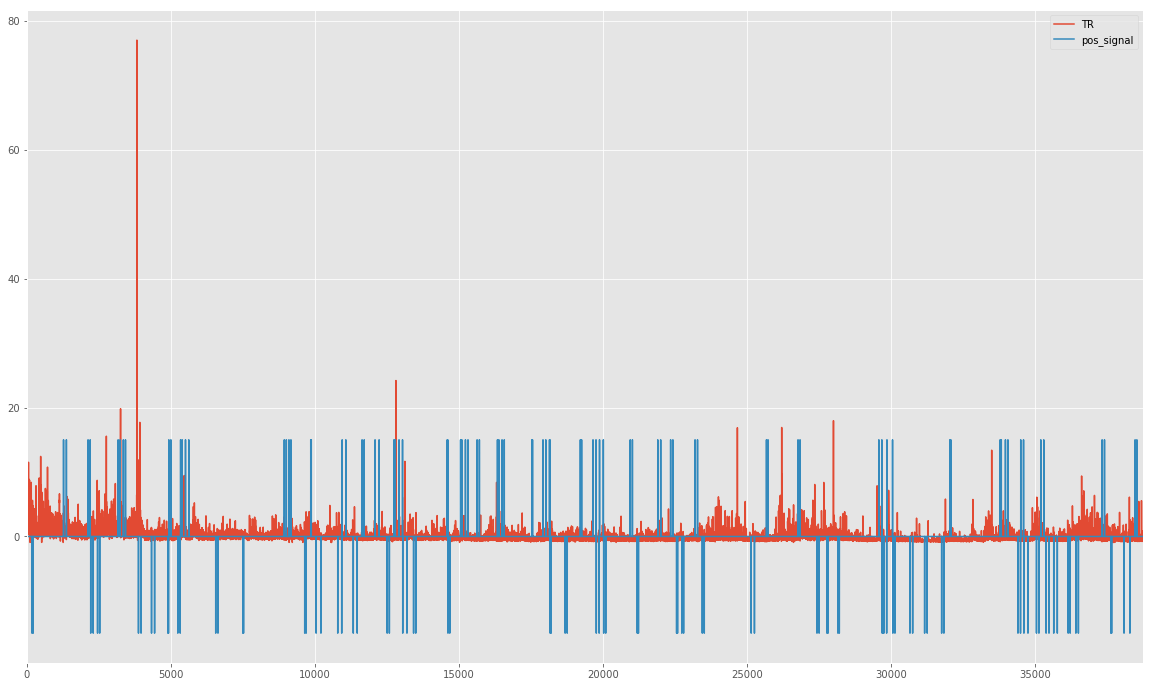

In [285]:
normed_merged.plot(figsize=(20, 12))

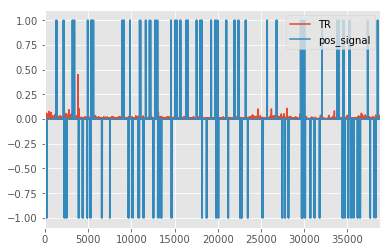

In [286]:
merged_eth[['TR', 'pos_signal']].plot()

In [293]:
pos_held = merged_eth[(merged_eth['pos_signal']==1) | (merged_eth['pos_signal']==-1)]

In [317]:
pos_held.head()

,dates,open,high,low,close,volume,prev_close,TR,all_strats,assets,pos_dirctn,qty,entry_price,exit_price,pos_signal
175,2017-12-09 19:45:00,0.031325,0.031347,0.031026,0.031320,4.632358,0.031217,0.010283,C06_ETHBTC_one_leg,ZW_BTC,空头,3698.0,67.74,,-1
218,2017-12-10 06:30:00,0.031579,0.031616,0.031299,0.031299,6.940646,0.031563,0.010043,C06_ETHBTC_one_leg,ZW_BTC,空头,3698.0,,68.94,-1
1271,2017-12-21 05:45:00,0.048264,0.048772,0.048000,0.048456,2.307621,0.048500,0.015918,C06_ETHBTC_one_leg,ZW_BTC,多头,4050.0,61.89,,1
1370,2017-12-22 06:30:00,0.049927,0.050158,0.049826,0.050060,18.569868,0.049927,0.006650,C06_ETHBTC_one_leg,ZW_BTC,多头,4050.0,,64.08,1
2122,2017-12-30 02:30:00,0.050785,0.051334,0.050655,0.050839,9.639794,0.050797,0.013367,C06_ETHBTC_one_leg,ZW_BTC,多头,3630.0,69.14,,1


In [312]:
trade_rounds = int(172/2)

In [326]:
merged_eth

,dates,open,high,low,close,volume,prev_close,TR,all_strats,assets,pos_dirctn,qty,entry_price,exit_price,pos_signal
0,2017-12-08 00:00:00,0.026218,0.026218,0.025571,0.025574,9.335432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2017-12-08 00:15:00,0.025574,0.025741,0.025100,0.025205,18.530062,0.025574,0.025065,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2017-12-08 00:30:00,0.025205,0.026457,0.025205,0.025826,16.680370,0.025205,0.049673,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2017-12-08 00:45:00,0.025804,0.026955,0.025800,0.026922,11.512267,0.025826,0.044722,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2017-12-08 01:00:00,0.026831,0.026905,0.026382,0.026687,9.116853,0.026922,0.019426,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2017-12-08 01:15:00,0.026654,0.027824,0.026515,0.027646,15.280571,0.026687,0.049050,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2017-12-08 01:30:00,0.027703,0.027703,0.026825,0.027070,12.974674,0.027646,0.031759,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2017-12-08 01:45:00,0.027070,0.027171,0.026617,0.026653,6.043708,0.027070,0.020465,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2017-12-08 02:00:00,0.026690,0.026723,0.026096,0.026099,5.146459,0.026653,0.023525,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2017-12-08 02:15:00,0.026149,0.026398,0.026007,0.026325,5.567211,0.026099,0.014981,NaN,NaN,NaN,NaN,NaN,NaN,0


In [337]:
dt_1_test = pos_held['dates'].values[0].astype(str)
dt_1_test

'2017-12-09T19:45:00.000000000'

In [338]:
dt_2_test = pos_held['dates'].values[4].astype(str)
dt_2_test

'2017-12-30T02:30:00.000000000'

In [332]:
date_list = []
for trade_round in range(0, trade_rounds):
    print ("提取第{}个交易组的持仓时间..".format(trade_round))
    date0 = pos_held['dates'].values[2*trade_round].astype(str)
    date1 = pos_held['dates'].values[2*trade_round+1].astype(str)
    date_list.append(date0)
    date_list.append(date1)

提取第0个交易组的持仓时间..
提取第1个交易组的持仓时间..
提取第2个交易组的持仓时间..
提取第3个交易组的持仓时间..
提取第4个交易组的持仓时间..
提取第5个交易组的持仓时间..
提取第6个交易组的持仓时间..
提取第7个交易组的持仓时间..
提取第8个交易组的持仓时间..
提取第9个交易组的持仓时间..
提取第10个交易组的持仓时间..
提取第11个交易组的持仓时间..
提取第12个交易组的持仓时间..
提取第13个交易组的持仓时间..
提取第14个交易组的持仓时间..
提取第15个交易组的持仓时间..
提取第16个交易组的持仓时间..
提取第17个交易组的持仓时间..
提取第18个交易组的持仓时间..
提取第19个交易组的持仓时间..
提取第20个交易组的持仓时间..
提取第21个交易组的持仓时间..
提取第22个交易组的持仓时间..
提取第23个交易组的持仓时间..
提取第24个交易组的持仓时间..
提取第25个交易组的持仓时间..
提取第26个交易组的持仓时间..
提取第27个交易组的持仓时间..
提取第28个交易组的持仓时间..
提取第29个交易组的持仓时间..
提取第30个交易组的持仓时间..
提取第31个交易组的持仓时间..
提取第32个交易组的持仓时间..
提取第33个交易组的持仓时间..
提取第34个交易组的持仓时间..
提取第35个交易组的持仓时间..
提取第36个交易组的持仓时间..
提取第37个交易组的持仓时间..
提取第38个交易组的持仓时间..
提取第39个交易组的持仓时间..
提取第40个交易组的持仓时间..
提取第41个交易组的持仓时间..
提取第42个交易组的持仓时间..
提取第43个交易组的持仓时间..
提取第44个交易组的持仓时间..
提取第45个交易组的持仓时间..
提取第46个交易组的持仓时间..
提取第47个交易组的持仓时间..
提取第48个交易组的持仓时间..
提取第49个交易组的持仓时间..
提取第50个交易组的持仓时间..
提取第51个交易组的持仓时间..
提取第52个交易组的持仓时间..
提取第53个交易组的持仓时间..
提取第54个交易组的持仓时间..
提取第55个交易组的持仓时间..
提取第56个交易组的持仓时间..
提取第57个交易组的持仓时间..
提取第58个交易组的持仓时间..
提取第59个交

In [373]:
appended_data = []
trade_record = {
                'trade_round_no':[],
                'date0':[],
                'date1':[],
                'entry_close':[], #df['close'][0]
                'high':[], #df['high']
                'low':[], #df['low]
                'range':[] # max((df['high']-df['low'])/df['close'][0], (df['close'][0]-df['low'])/df['close'][0])
                }

for trade_round in range(0, trade_rounds):
#     print ("提取第{}个交易组的持仓时间..".format(trade_round))
    date0 = pd.to_datetime(pos_held['dates'].values[2*trade_round].astype(str))
    date1 = pd.to_datetime(pos_held['dates'].values[2*trade_round+1].astype(str))
    df = merged_eth[(merged_eth['dates']>=date0)&(merged_eth['dates']<=date1)]
    entry_close = df['close'].values[0]
    high = df['high'].max()
    low = df['low'].min()
    range_ = max(abs(high-entry_close)/entry_close, abs(entry_close-low)/entry_close)

    appended_data.append(df)
    trade_record['trade_round_no'].append(trade_round)
    trade_record['date0'].append(date0)
    trade_record['date1'].append(date1)
    trade_record['entry_close'].append(entry_close)
    trade_record['high'].append(high)
    trade_record['low'].append(low)
    trade_record['range'].append(range_)
    
    
appended_data = pd.concat(appended_data, axis = 0)
appended_data.head(2)

,dates,open,high,low,close,volume,prev_close,TR,all_strats,assets,pos_dirctn,qty,entry_price,exit_price,pos_signal
175,2017-12-09 19:45:00,0.031325,0.031347,0.031026,0.031320,4.632358,0.031217,0.010283,C06_ETHBTC_one_leg,ZW_BTC,空头,3698.0,67.74,,-1
176,2017-12-09 20:00:00,0.031297,0.031381,0.031159,0.031281,8.526378,0.031320,0.007088,NaN,NaN,NaN,NaN,NaN,NaN,0
177,2017-12-09 20:15:00,0.031272,0.031337,0.031160,0.031226,7.397074,0.031281,0.005658,NaN,NaN,NaN,NaN,NaN,NaN,0
178,2017-12-09 20:30:00,0.031143,0.031501,0.031052,0.031501,10.439063,0.031226,0.014379,NaN,NaN,NaN,NaN,NaN,NaN,0
179,2017-12-09 20:45:00,0.031501,0.031918,0.031501,0.031905,6.219335,0.031501,0.013238,NaN,NaN,NaN,NaN,NaN,NaN,0
180,2017-12-09 21:00:00,0.031818,0.031939,0.031552,0.031560,3.478545,0.031905,0.012130,NaN,NaN,NaN,NaN,NaN,NaN,0
181,2017-12-09 21:15:00,0.031575,0.031663,0.031426,0.031462,4.925305,0.031560,0.007510,NaN,NaN,NaN,NaN,NaN,NaN,0
182,2017-12-09 21:30:00,0.031497,0.031497,0.031269,0.031374,5.358716,0.031462,0.007247,NaN,NaN,NaN,NaN,NaN,NaN,0
183,2017-12-09 21:45:00,0.031423,0.031423,0.031025,0.031025,3.829453,0.031374,0.012686,NaN,NaN,NaN,NaN,NaN,NaN,0
184,2017-12-09 22:00:00,0.031167,0.031418,0.031054,0.031273,10.529833,0.031025,0.011732,NaN,NaN,NaN,NaN,NaN,NaN,0


In [378]:
result = pd.DataFrame(trade_record)

In [387]:
result.head(2)

,date0,date1,entry_close,high,low,range,trade_round_no
0,2017-12-09 19:45:00,2017-12-10 06:30:00,0.031320,0.034772,0.031010,0.110217,0
1,2017-12-21 05:45:00,2017-12-22 06:30:00,0.048456,0.051737,0.046926,0.067711,1


In [383]:
result[result['range']>0.1]

,date0,date1,entry_close,high,low,range,trade_round_no
0,2017-12-09 19:45:00,2017-12-10 06:30:00,0.031320,0.034772,0.031010,0.110217,0
4,2018-01-02 13:00:00,2018-01-03 07:30:00,0.064698,0.065222,0.053978,0.165693,4
5,2018-01-09 23:30:00,2018-01-10 16:30:00,0.082147,0.099349,0.080321,0.209405,5
7,2018-01-17 08:00:00,2018-01-18 06:30:00,0.093765,0.093914,0.076863,0.180259,7


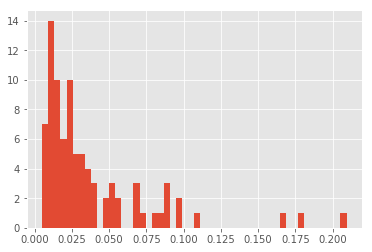

In [386]:
result['range'].hist(bins = 50)

In [380]:
result['range'].max()

0.20940509087367778